In [337]:
# Import the needed Libraries 
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [338]:
# Getting the data frame
df = web.DataReader('WIPRO.BO', data_source='yahoo', start='2012-01-01', end='2022-03-01')

# Showing the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,150.750031,148.125031,149.625031,149.400040,161965.0,135.309433
2012-01-03,156.750046,150.562531,150.562531,156.262543,433541.0,141.524658
2012-01-04,159.262543,155.343781,156.393784,156.712540,415826.0,141.932236
2012-01-05,158.512543,154.181290,156.337540,155.381287,200026.0,140.726532
2012-01-06,154.575043,151.256287,154.537537,152.062531,337826.0,137.720779
...,...,...,...,...,...,...
2022-02-14,557.000000,530.500000,530.500000,541.900024,893093.0,541.900024
2022-02-15,565.000000,543.400024,546.700012,563.450012,586089.0,563.450012
2022-02-16,570.000000,557.500000,565.750000,564.250000,622038.0,564.250000


In [339]:
# Create a Data frame with only 'Close' Column
data = df.filter(['Close'])

# Convert the data frame into a numpy array
dataset = data.values

# Get the number of rows to train our model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2000

In [340]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04554177],
       [0.05698977],
       [0.05774045],
       ...,
       [0.7375928 ],
       [0.73859367],
       [0.73467345]])

In [341]:
#  Create the training data set
#  Create the scaled training data set

train_data = scaled_data[0:training_data_len, :] 

# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    
    if i <= 61:
        print(x_train)
        print()
        print(y_train)


[array([0.04554177, 0.05698977, 0.05774045, 0.05551966, 0.04998332,
       0.04804406, 0.04863835, 0.04744977, 0.04091251, 0.04716824,
       0.05110936, 0.05573862, 0.04873218, 0.04910753, 0.05511305,
       0.0564893 , 0.05836602, 0.05820963, 0.05770917, 0.05257947,
       0.05483152, 0.05379933, 0.06271375, 0.06283886, 0.06265121,
       0.06333933, 0.06821881, 0.07441197, 0.07663276, 0.06943867,
       0.06846903, 0.0686567 , 0.07065853, 0.07732091, 0.07400536,
       0.07312957, 0.07212864, 0.07003296, 0.06171285, 0.05924182,
       0.06640465, 0.06196307, 0.06393362, 0.06568523, 0.06581034,
       0.07112771, 0.06665487, 0.06978274, 0.06624826, 0.06243225,
       0.06346444, 0.06409001, 0.06327679, 0.06415258, 0.06327679,
       0.05992996, 0.06177539, 0.05999253, 0.06343318, 0.06527862])]

[0.06868798650598082]
[array([0.04554177, 0.05698977, 0.05774045, 0.05551966, 0.04998332,
       0.04804406, 0.04863835, 0.04744977, 0.04091251, 0.04716824,
       0.05110936, 0.05573862, 0.04

In [342]:
# Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [343]:
# Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1940, 60, 1)

In [344]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [345]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [346]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1940/1940 [==============================] - 74s 36ms/step - loss: 1.7897e-04


In [347]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60 : , :]

# Create the Data Sets x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])
    

In [348]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [349]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [350]:
# Get the model's predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [351]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

18.56316563791646

<ipython-input-352-2c706079815c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


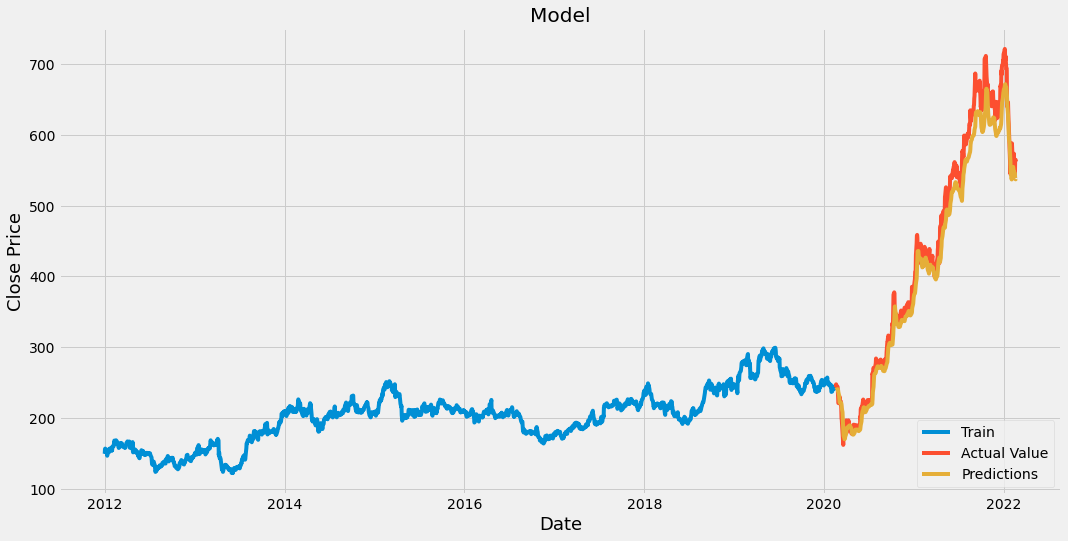

In [352]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [353]:
#  Show the valid and the predicted prices
valid

,Close,Predictions
Date,,
2020-02-18,244.100006,239.173996
2020-02-19,247.550003,239.346191
2020-02-20,245.550003,240.102325
2020-02-24,244.199997,240.606674
2020-02-25,244.149994,240.652740
...,...,...
2022-02-14,541.900024,545.869202
2022-02-15,563.450012,539.836182
2022-02-16,564.250000,537.573547


In [354]:
valid.to_csv('WIPRO.csv')